<a href="https://colab.research.google.com/github/rajsahu2004/Rock-Physics-Project/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
try:
  import lasio
except:
  %pip install lasio
  import lasio

In [42]:
try:
  las = lasio.read('data/gorgonichthys_1_wire_gold.las',engine='normal')
except:
  print('Fetching from github...')
  las = lasio.read('https://raw.githubusercontent.com/rajsahu2004/Rock-Physics-Project/main/data/gorgonichthys_1_wire_gold.las',engine='normal')

Fetching from github...


In [43]:
las.version

[HeaderItem(mnemonic="VERS", unit="", value="2.0", descr="CWLS LOG ASCII STANDA"),
 HeaderItem(mnemonic="WRAP", unit="", value="YES", descr="Multiple lines per de")]

In [44]:
las.curves

[CurveItem(mnemonic="DEPTH", unit="M", value="", descr="", original_mnemonic="DEPTH", data.shape=(30015,)),
 CurveItem(mnemonic="AI", unit="GF/C3S", value="", descr="Acoustic impedence", original_mnemonic="AI", data.shape=(30015,)),
 CurveItem(mnemonic="BADHOLE", unit="", value="", descr="0", original_mnemonic="BADHOLE", data.shape=(30015,)),
 CurveItem(mnemonic="BMOD", unit="6PSI", value="", descr="Bulk modulus", original_mnemonic="BMOD", data.shape=(30015,)),
 CurveItem(mnemonic="CAL", unit="IN", value="00001000", descr="", original_mnemonic="CAL", data.shape=(30015,)),
 CurveItem(mnemonic="COAL", unit="", value="", descr="0", original_mnemonic="COAL", data.shape=(30015,)),
 CurveItem(mnemonic="DRHO_GOLD", unit="G/C3", value="00001000", descr="", original_mnemonic="DRHO_GOLD", data.shape=(30015,)),
 CurveItem(mnemonic="DTC_GOLD", unit="US/F", value="00001000", descr="", original_mnemonic="DTC_GOLD", data.shape=(30015,)),
 CurveItem(mnemonic="DTC_PRED", unit="US/F", value="", descr="E

In [45]:
data = las.df()
data.reset_index(inplace=True)
data.head()

,DEPTH,AI,BADHOLE,BMOD,CAL,COAL,DRHO_GOLD,DTC_GOLD,DTC_PRED,DTS_GOLD,...,SI,SMOD,SWT,SXOT,VOL_WETCLAY,VP,VPVS,VS,YMD,YMOD
0,196.90079,NaN,0.0,NaN,NaN,0.0,NaN,NaN,77.8546,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,197.05319,NaN,0.0,NaN,NaN,0.0,NaN,NaN,77.6582,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,197.20559,NaN,0.0,NaN,NaN,0.0,NaN,NaN,77.4047,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,197.35799,NaN,0.0,NaN,NaN,0.0,NaN,NaN,76.8988,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,197.51039,NaN,0.0,NaN,NaN,0.0,NaN,NaN,75.9863,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# Percentage of data missing
data.isnull().sum() / data.shape[0] * 100

DEPTH                0.000000
AI                  48.912211
BADHOLE              0.000000
BMOD                48.912211
CAL                 48.565717
COAL                 0.000000
DRHO_GOLD           48.745627
DTC_GOLD            46.320173
DTC_PRED             0.676329
DTS_GOLD            46.473430
DTS_PRED             0.676329
GR_GOLD              0.676329
K                   48.912211
KINT                81.855739
LAMRH               48.912211
MURH                48.912211
NETSAND             81.632517
NPHI_GOLD           81.555889
PAY                 81.632517
PEF                 48.682326
PHIE                81.632517
PHIT                81.632517
PR                  48.912211
RES_DEEP_GOLD       48.245877
RES_SHALLOW_GOLD    48.255872
RHOB_GOLD           48.912211
RHOB_PRED            0.676329
SI                  48.912211
SMOD                48.912211
SWT                 81.632517
SXOT                81.632517
VOL_WETCLAY         81.632517
VP                  46.320173
VPVS      

In [48]:
columns_needed = ['DEPTH','DT','DTS','GR','RHO','VP','VS','VPVS','IP','IS','VSH','RHOm','RHOf','PHIE','SWT']
data.columns

Index(['DEPTH', 'AI', 'BADHOLE', 'BMOD', 'CAL', 'COAL', 'DRHO_GOLD',
       'DTC_GOLD', 'DTC_PRED', 'DTS_GOLD', 'DTS_PRED', 'GR_GOLD', 'K', 'KINT',
       'LAMRH', 'MURH', 'NETSAND', 'NPHI_GOLD', 'PAY', 'PEF', 'PHIE', 'PHIT',
       'PR', 'RES_DEEP_GOLD', 'RES_SHALLOW_GOLD', 'RHOB_GOLD', 'RHOB_PRED',
       'SI', 'SMOD', 'SWT', 'SXOT', 'VOL_WETCLAY', 'VP', 'VPVS', 'VS', 'YMD',
       'YMOD'],
      dtype='object')

In [49]:
L = data[['DEPTH','DTC_GOLD','DTS_GOLD','GR_GOLD','RHOB_GOLD','VP','VS','VPVS','AI','SI','VOL_WETCLAY','PHIE','SWT']]
L.loc[:,'RHOm'] = 2.65
L.loc[:,'RHOf'] = 1
L = L.dropna()
DEPTH_MIN = 3928.3
DEPTH_MAX = 4090.5
L = L[(L['DEPTH']>DEPTH_MIN) & (L['DEPTH']<DEPTH_MAX)]
L.head()

<ipython-input-49-22819802f14a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L.loc[:,'RHOm'] = 2.65
<ipython-input-49-22819802f14a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  L.loc[:,'RHOf'] = 1


,DEPTH,DTC_GOLD,DTS_GOLD,GR_GOLD,RHOB_GOLD,VP,VS,VPVS,AI,SI,VOL_WETCLAY,PHIE,SWT,RHOm,RHOf
24485,3928.41373,75.0295,127.905,90.7562,2.6661,13328.0908,7818.3027,1.7047,35533.9219,20844.3184,0.575355,0.001001,1.0,2.65,1
24486,3928.56613,74.5634,128.394,95.7989,2.6673,13411.4053,7788.5259,1.7219,35771.8203,20774.0898,0.562940,0.001001,1.0,2.65,1
24487,3928.71853,74.2541,128.675,100.0100,2.6684,13467.2705,7771.5171,1.7329,35936.6641,20737.8613,0.582759,0.001001,1.0,2.65,1
24488,3928.87093,73.6112,128.530,106.8610,2.6696,13584.8896,7780.2847,1.7461,36266.4961,20770.4062,0.589147,0.001001,1.0,2.65,1
24489,3929.02333,72.8832,128.140,112.0420,2.6708,13720.5830,7803.9644,1.7582,36644.8828,20842.8008,0.586680,0.001001,1.0,2.65,1


In [50]:
# Names needed: ['DEPTH','DT','DTS','GR','RHO','VP','VS','VPVS','IP','IS','VSH','RHOm','RHOf','PHIE','SWT]
col_rename = {
    'DEPTH':'DEPTH',
    'DTC_GOLD':'DT',
    'DTS_GOLD':'DTS',
    'GR_GOLD':'GR',
    'RHOB_GOLD':'RHO',
    'VP':'VP',
    'VS':'VS',
    'VPVS':'VPVS',
    'AI':'IP',
    'SI':'IS',
    'VOL_WETCLAY':'VSH',
    'PHIE':'PHIE',
    'SWT':'SW'
}
L.rename(columns = col_rename,inplace = True)
L.columns

Index(['DEPTH', 'DT', 'DTS', 'GR', 'RHO', 'VP', 'VS', 'VPVS', 'IP', 'IS',
       'VSH', 'PHIE', 'SW', 'RHOm', 'RHOf'],
      dtype='object')

In [51]:
# Percentage of data missing
L.isnull().sum() / L.shape[0] * 100

DEPTH    0.0
DT       0.0
DTS      0.0
GR       0.0
RHO      0.0
VP       0.0
VS       0.0
VPVS     0.0
IP       0.0
IS       0.0
VSH      0.0
PHIE     0.0
SW       0.0
RHOm     0.0
RHOf     0.0
dtype: float64

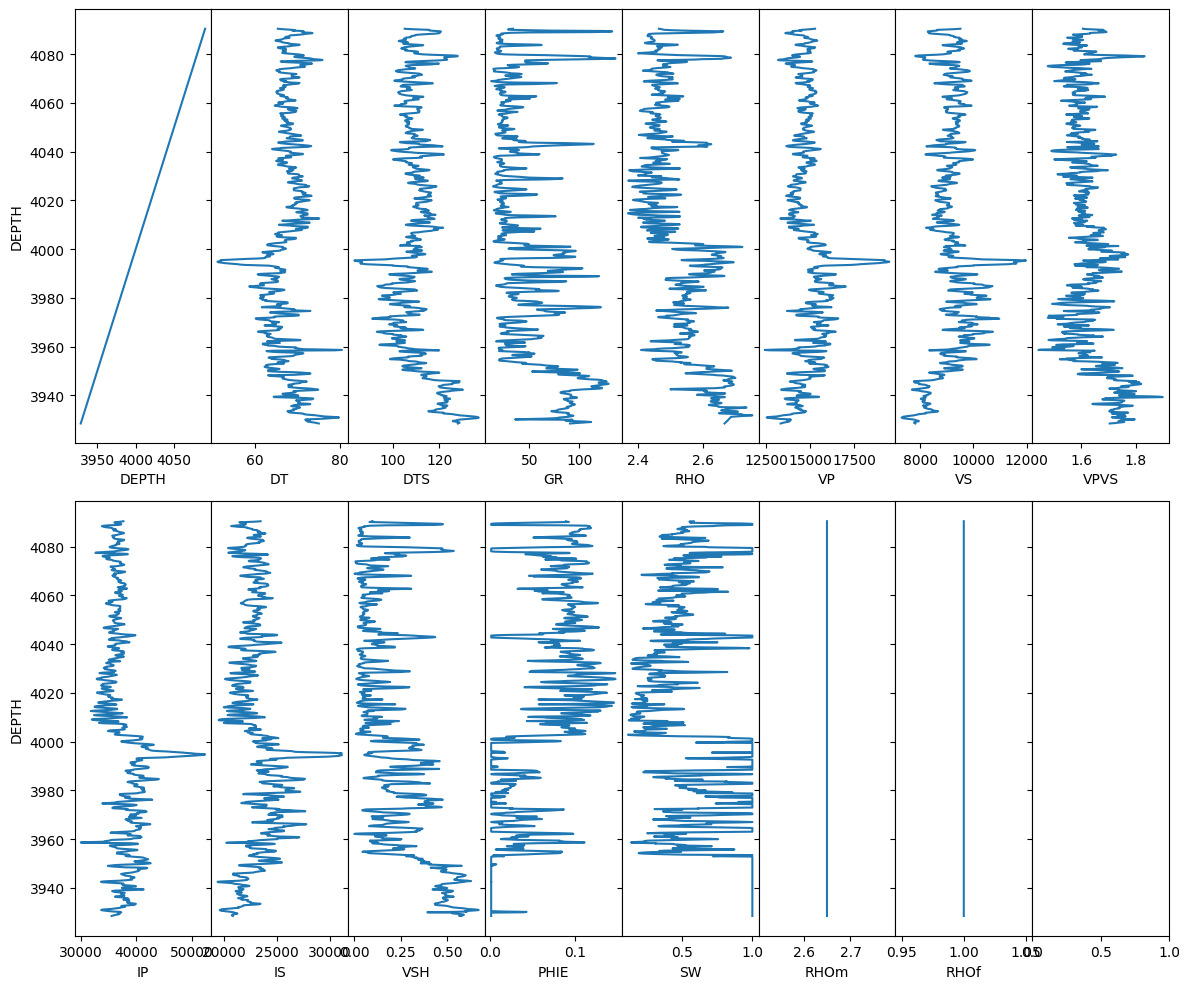

In [53]:
fig, axes = plt.subplots(2, 8, figsize=(12, 10), sharey=True, gridspec_kw={'wspace': 0})
for i, column in enumerate(L.columns):
    row = i // 8
    col = i % 8
    axes[row, col].plot(L[column], L['DEPTH'])
    axes[row, col].set_xlabel(column)
    if col == 0:
        axes[row, col].set_ylabel('DEPTH')
plt.tight_layout()
plt.show()

In [54]:
# define basic styles for plotting log curves (sty0), sand (sty1) and shale (sty2)
sty0 = {'lw':1, 'color':'k', 'ls':'-'}
sty1 = {'marker':'o', 'color':'g', 'ls':'none', 'ms':6, 'mec':'none', 'alpha':0.5}
sty2 = {'marker':'o', 'color':'r', 'ls':'none', 'ms':6, 'mec':'none', 'alpha':0.5}

def plotlog(L, cutoff_sand, cutoff_shale):
    # define filters to select sand (ss) and shale (sh)
    ss =  (L.VSH<=cutoff_sand)
    sh =  (L.VSH>=cutoff_shale)

    # plot figure
    f = plt.subplots(figsize=(14, 6))
    ax0 = plt.subplot2grid((1,9), (0,0), colspan=1) # gr curve
    ax1 = plt.subplot2grid((1,9), (0,1), colspan=1) # ip curve
    ax2 = plt.subplot2grid((1,9), (0,2), colspan=1) # vp/vs curve
    ax3 = plt.subplot2grid((1,9), (0,3), colspan=3) # crossplot phi - vp
    ax4 = plt.subplot2grid((1,9), (0,6), colspan=3) # crossplot ip - vp/vs

    ax0.plot(L.VSH[ss], L.index[ss], **sty1)
    ax0.plot(L.VSH[sh], L.index[sh], **sty2)
    ax0.plot(L.VSH, L.index, **sty0)
    ax0.set_xlabel('VSH')
    ax0.locator_params(axis='x', nbins=2)

    ax1.plot(L.IP[ss], L.index[ss], **sty1)
    ax1.plot(L.IP[sh], L.index[sh], **sty2)
    ax1.plot(L.IP, L.index,  **sty0)
    ax1.set_xlabel('$I_\mathrm{P}$')
    ax1.locator_params(axis='x', nbins=2)

    ax2.plot(L.VPVS[ss], L.index[ss], **sty1)
    ax2.plot(L.VPVS[sh], L.index[sh], **sty2)
    ax2.plot(L.VPVS, L.index, **sty0)
    ax2.set_xlabel('$V_\mathrm{P}/V_\mathrm{S}$')
    ax2.locator_params(axis='x', nbins=2)

    ax3.plot(L.PHIE[ss], L.VP[ss], **sty1)
    ax3.set_xlabel('$V_\mathrm{P}$ vs $\phi_\mathrm{e}$')

    ax4.plot(L.VP*L.RHO[ss], L.VP/L.VS[ss], **sty1)
    ax4.plot(L.VP*L.RHO[sh], L.VP/L.VS[sh], **sty2)
    ax4.set_xlabel('$V_\mathrm{P}/V_\mathrm{S}$ vs $I_\mathrm{P}$')

    for ax in [ax0, ax1, ax2]:
        if ax != ax0 and ax != ax1 and ax != ax2:
            ax.remove()
    for aa in [ax0,ax1,ax2,ax3,ax4]:
        aa.tick_params(which='major', labelsize=8)
    for aa in [ax1,ax2]:
        aa.set_yticklabels([])
    plt.subplots_adjust(wspace=.8,left=0.05,right=0.95)
    plt.show()

<ipython-input-54-8af5829eab61>:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax0 = plt.subplot2grid((1,9), (0,0), colspan=1) # gr curve


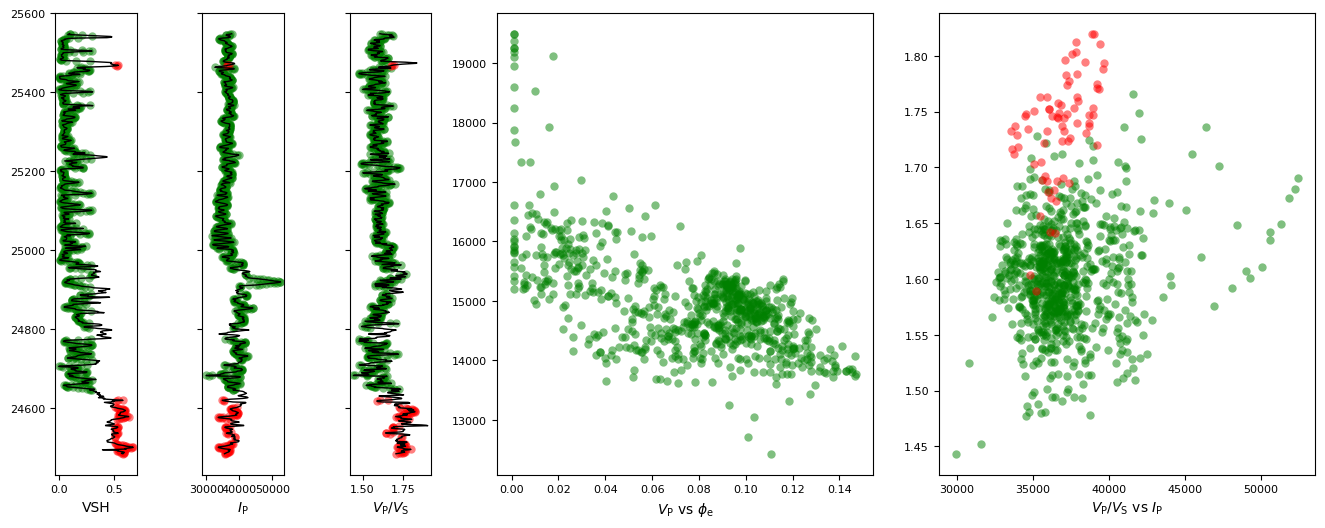

In [55]:
plotlog(L, 0.3, 0.5)

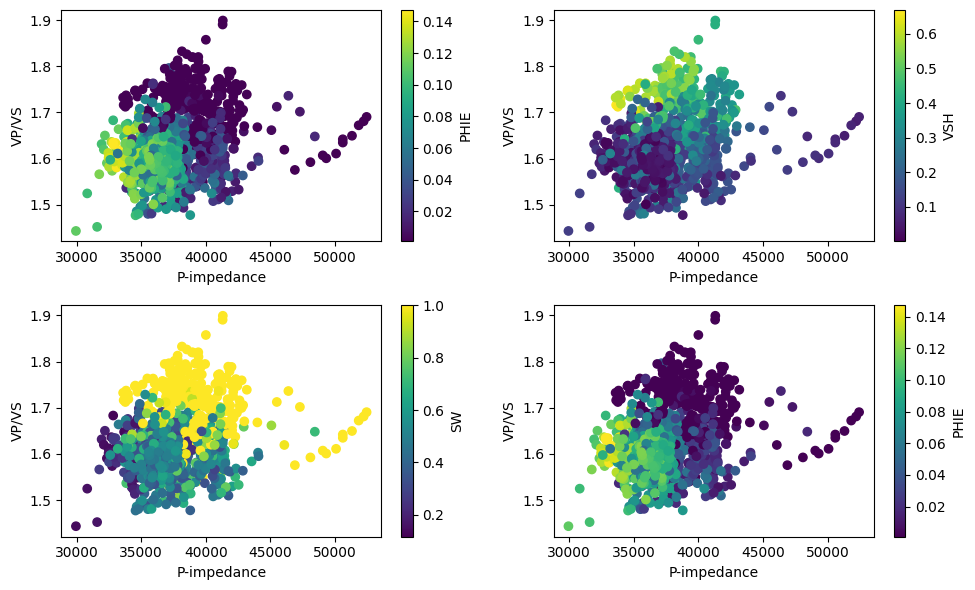

In [59]:
df = L.copy()
df['VP_VS'] = df['VP'] / df['VS']
fig, axes = plt.subplots(2,2,figsize=(10,6))
sc = axes[0,0].scatter(df['IP'], df['VP_VS'], c=df['PHIE'], marker='o')
cbar = plt.colorbar(sc, ax=axes[0,0], label='PHIE')
axes[0,0].set_xlabel('P-impedance')
axes[0,0].set_ylabel('VP/VS')
sc = axes[0,1].scatter(df['IP'], df['VP_VS'], c=df['VSH'], marker='o')
cbar = plt.colorbar(sc, ax=axes[0,1], label='VSH')
axes[0,1].set_xlabel('P-impedance')
axes[0,1].set_ylabel('VP/VS')
sc = axes[1,0].scatter(df['IP'], df['VP_VS'], c=df['SW'], marker='o')
cbar = plt.colorbar(sc, ax=axes[1,0], label='SW')
axes[1,0].set_xlabel('P-impedance')
axes[1,0].set_ylabel('VP/VS')
sc = axes[1,1].scatter(df['IP'], df['VP_VS'], c=df['PHIE'], marker='o')
cbar = plt.colorbar(sc, ax=axes[1,1], label='PHIE')
axes[1,1].set_xlabel('P-impedance')
axes[1,1].set_ylabel('VP/VS')
plt.tight_layout()
plt.show()